<a href="https://colab.research.google.com/github/pandearthr/learn-pandas/blob/main/updateUTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Twitter Auth Token

twitter_auth_token = '084f8755c9ebe0207549fd3bd41a94991e9c7e16' # change this auth token

In [2]:
import pandas

# Install required Python package
!pip install pandas

# Install Node.js (because tweet-harvest built using Node.js)
!sudo apt-get update
!sudo apt-get install -y ca-certificates curl gnupg
!sudo mkdir -p /etc/apt/keyrings
!curl -fsSL https://deb.nodesource.com/gpgkey/nodesource-repo.gpg.key | sudo gpg --dearmor -o /etc/apt/keyrings/nodesource.gpg

!NODE_MAJOR=20 && echo "deb [signed-by=/etc/apt/keyrings/nodesource.gpg] https://deb.nodesource.com/node_$NODE_MAJOR.x nodistro main" | sudo tee /etc/apt/sources.list.d/nodesource.list

!sudo apt-get update
!sudo apt-get install nodejs -y

# Install missing dependencies for playwright
!sudo apt-get install -y libatk1.0-0 libatk-bridge2.0-0 libgdk-pixbuf2.0-0 libgtk-3-0 libgbm-dev

!node -v

Hit:1 https://cli.github.com/packages stable InRelease
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:8 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [83.6 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [2,201 kB]
Get:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/u

In [3]:
# Crawl Data

filename = 'banjir.csv'
search_keyword = 'banjir since:2025-11-25 until:2025-11-30 lang:id'
limit = 450

!npx -y tweet-harvest@2.6.1 -o "{filename}" -s "{search_keyword}" --tab "LATEST" -l {limit} --token {twitter_auth_token}

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼npm warn deprecated rimraf@3.0.2: Rimraf versions prior to v4 are no longer supported
⠴npm warn deprecated inflight@1.0.6: This module is not supported, and leaks memory. Do not use it. Check out lru-cache if you want a good and tested way to coalesce async requests by a key value, which is much more comprehensive and powerful.
⠴npm warn deprecated glob@7.2.3: Glob versions prior to v9 are no longer supported
⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋Tweet Harvest [v2.6.1]

Research by Helmi Satria
Use it for Educational Purposes only!

This script uses Chromium Browser to crawl data from Twitter with your Twitter auth token.
Please enter your Twitter auth token when prompted.

Note: Keep your access token secret!

In [4]:
import pandas as pd

# Specify the path to your CSV file
file_path = f"tweets-data/{filename}"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path, delimiter=",")

# Display the DataFrame
display(df)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1994919099798098077,Sat Nov 29 23:59:11 +0000 2025,0,Maafya blm post2 dulu karna lg banjir dan mau ...,1994919099798098077,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491909979809...,38772772,NaN
1,1994918996102291724,Sat Nov 29 23:58:47 +0000 2025,0,PATUNGAN Warga Bantu Warga #PrayForSumatra #Al...,1994918996102291724,https://pbs.twimg.com/media/G69gQLVbkAELTKx.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/199491899610229...,1794060249722417152,NaN
2,1994918922735555053,Sat Nov 29 23:58:29 +0000 2025,0,Keadaan ayahku gimana yaa soalnya di sana gk a...,1994918922735555053,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491892273555...,1688023410063122432,NaN
3,1994918887822168568,Sat Nov 29 23:58:21 +0000 2025,0,Personel Siaga Batalyon B Pelopor Satbrimob Po...,1994918887822168568,https://pbs.twimg.com/media/G69fttNbkAUwMhv.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491888782216...,1952328879219388416,NaN
4,1994918705659285555,Sat Nov 29 23:57:37 +0000 2025,0,707 Titik Pemancar Sinyal Pulih Warga Mulai Bi...,1994918705659285555,https://pbs.twimg.com/media/G69f_b5bQAAPMTP.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491870565928...,317626075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,1994834413889491409,Sat Nov 29 18:22:41 +0000 2025,3,dr kemarin nangisin gajah ama anabul yg kejeba...,1994834413889491409,NaN,NaN,in,NaN,0,0,1,https://x.com/undefined/status/199483441388949...,1164837582657617920,NaN
455,1994833798929011005,Sat Nov 29 18:22:14 +0000 2025,0,Aku bersyukur rumahku dulunya gudang padi jadi...,1994834301800911282,NaN,boonakigatto,in,NaN,0,1,0,https://x.com/undefined/status/199483430180091...,1615997255533887489,NaN
456,1994834078471012794,Sat Nov 29 18:21:21 +0000 2025,0,Baru pertama kali seumur hidup ngerasain banji...,1994834078471012794,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199483407847101...,1305411075278471170,NaN
457,1994558312650883328,Sat Nov 29 18:20:57 +0000 2025,0,@mas_veel komparasi banjir DKI tahun 2020 cura...,1994833980206846244,https://pbs.twimg.com/media/G68SpovbwAACjfS.png,mas_veel,in,NaN,0,0,0,https://x.com/undefined/status/199483398020684...,473417028,NaN


In [5]:
# Cek jumlah data yang didapatkan

num_tweets = len(df)
print(f"Jumlah tweet dalam dataframe adalah {num_tweets}.")

Jumlah tweet dalam dataframe adalah 459.


**1. IMPORT LIBRARY**

In [6]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


**2. LOAD DATASET**

In [7]:
from google.colab import files
import pandas as pd

# Upload file CSV dari laptop
uploaded = files.upload()

# Ambil nama file pertama secara otomatis
filename = list(uploaded.keys())[0]

# Load dataset ke DataFrame
df = pd.read_csv(filename, encoding='latin1')
df.head()

Saving banjir.csv to banjir.csv


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1994919099798098077,Sat Nov 29 23:59:11 +0000 2025,0,Maafya blm post2 dulu karna lg banjir dan mau ...,1994919099798098077,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491909979809...,38772772,NaN
1,1994918996102291724,Sat Nov 29 23:58:47 +0000 2025,0,PATUNGAN Warga Bantu Warga #PrayForSumatra #Al...,1994918996102291724,https://pbs.twimg.com/media/G69gQLVbkAELTKx.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/199491899610229...,1794060249722417152,NaN
2,1994918922735555053,Sat Nov 29 23:58:29 +0000 2025,0,Keadaan ayahku gimana yaa soalnya di sana gk a...,1994918922735555053,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491892273555...,1688023410063122432,NaN
3,1994918887822168568,Sat Nov 29 23:58:21 +0000 2025,0,Personel Siaga Batalyon B Pelopor Satbrimob Po...,1994918887822168568,https://pbs.twimg.com/media/G69fttNbkAUwMhv.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491888782216...,1952328879219388416,NaN
4,1994918705659285555,Sat Nov 29 23:57:37 +0000 2025,0,707 Titik Pemancar Sinyal Pulih Warga Mulai Bi...,1994918705659285555,https://pbs.twimg.com/media/G69f_b5bQAAPMTP.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491870565928...,317626075,NaN


**3. PREPROCESSING**

In [8]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"@\w+|#", "", text)
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"\d+", "", text)
    text = text.strip()
    return text

df['clean_text'] = df['full_text'].apply(clean_text)
df.head()

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_text
0,1994919099798098077,Sat Nov 29 23:59:11 +0000 2025,0,Maafya blm post2 dulu karna lg banjir dan mau ...,1994919099798098077,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491909979809...,38772772,NaN,maafya blm post dulu karna lg banjir dan mau b...
1,1994918996102291724,Sat Nov 29 23:58:47 +0000 2025,0,PATUNGAN Warga Bantu Warga #PrayForSumatra #Al...,1994918996102291724,https://pbs.twimg.com/media/G69gQLVbkAELTKx.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/199491899610229...,1794060249722417152,NaN,patungan warga bantu warga prayforsumatra alle...
2,1994918922735555053,Sat Nov 29 23:58:29 +0000 2025,0,Keadaan ayahku gimana yaa soalnya di sana gk a...,1994918922735555053,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491892273555...,1688023410063122432,NaN,keadaan ayahku gimana yaa soalnya di sana gk a...
3,1994918887822168568,Sat Nov 29 23:58:21 +0000 2025,0,Personel Siaga Batalyon B Pelopor Satbrimob Po...,1994918887822168568,https://pbs.twimg.com/media/G69fttNbkAUwMhv.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491888782216...,1952328879219388416,NaN,personel siaga batalyon b pelopor satbrimob po...
4,1994918705659285555,Sat Nov 29 23:57:37 +0000 2025,0,707 Titik Pemancar Sinyal Pulih Warga Mulai Bi...,1994918705659285555,https://pbs.twimg.com/media/G69f_b5bQAAPMTP.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491870565928...,317626075,NaN,titik pemancar sinyal pulih warga mulai bisa t...


**4. LEXICON-BASED SENTIMENT**

In [9]:
positive_words = ["murah", "bagus", "keren", "cakep", "ori", "berkualitas",
                  "mantap", "recommended", "puas"]

negative_words = ["jelek", "bau", "rusak", "penipuan", "tipu", "buruk",
                  "ripoff", "sampah", "menyesal"]

def lexicon_sentiment(text):
    text_split = text.split()

    score = 0
    for w in text_split:
        if w in positive_words:
            score += 1
        elif w in negative_words:
            score -= 1

    if score > 0:
        return 1
    elif score < 0:
        return -1
    else:
        return 0

df['label'] = df['clean_text'].apply(lexicon_sentiment)
df.head()


,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username,clean_text,label
0,1994919099798098077,Sat Nov 29 23:59:11 +0000 2025,0,Maafya blm post2 dulu karna lg banjir dan mau ...,1994919099798098077,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491909979809...,38772772,NaN,maafya blm post dulu karna lg banjir dan mau b...,0
1,1994918996102291724,Sat Nov 29 23:58:47 +0000 2025,0,PATUNGAN Warga Bantu Warga #PrayForSumatra #Al...,1994918996102291724,https://pbs.twimg.com/media/G69gQLVbkAELTKx.jpg,NaN,in,NaN,0,0,1,https://x.com/undefined/status/199491899610229...,1794060249722417152,NaN,patungan warga bantu warga prayforsumatra alle...,0
2,1994918922735555053,Sat Nov 29 23:58:29 +0000 2025,0,Keadaan ayahku gimana yaa soalnya di sana gk a...,1994918922735555053,NaN,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491892273555...,1688023410063122432,NaN,keadaan ayahku gimana yaa soalnya di sana gk a...,0
3,1994918887822168568,Sat Nov 29 23:58:21 +0000 2025,0,Personel Siaga Batalyon B Pelopor Satbrimob Po...,1994918887822168568,https://pbs.twimg.com/media/G69fttNbkAUwMhv.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491888782216...,1952328879219388416,NaN,personel siaga batalyon b pelopor satbrimob po...,0
4,1994918705659285555,Sat Nov 29 23:57:37 +0000 2025,0,707 Titik Pemancar Sinyal Pulih Warga Mulai Bi...,1994918705659285555,https://pbs.twimg.com/media/G69f_b5bQAAPMTP.jpg,NaN,in,NaN,0,0,0,https://x.com/undefined/status/199491870565928...,317626075,NaN,titik pemancar sinyal pulih warga mulai bisa t...,0


**5. VISUALISASI DISTRIBUSI SENTIMEN**

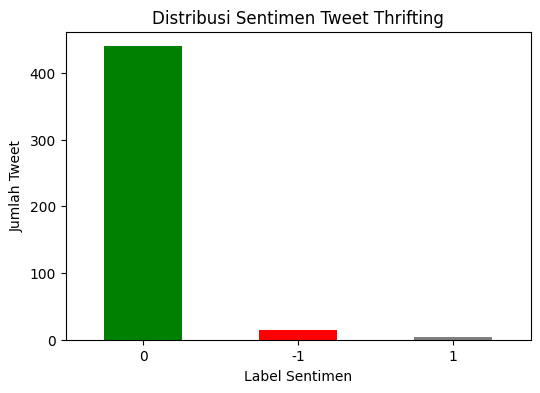

In [10]:
plt.figure(figsize=(6,4))
df['label'].value_counts().plot(kind='bar', color=['green','red','gray'])
plt.xticks(rotation=0)
plt.title("Distribusi Sentimen Tweet Thrifting")
plt.xlabel("Label Sentimen")
plt.ylabel("Jumlah Tweet")
plt.show()


**6. TF-IDF**

In [11]:
vectorizer = TfidfVectorizer(max_features=3000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['label']

X.shape


(459, 3000)

**7. TRAINING NAIVE BAYES**

The Accuracy is 95.65%
[[ 0  4]
 [ 0 88]]
The classification report is:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.96      1.00      0.98        88

    accuracy                           0.96        92
   macro avg       0.48      0.50      0.49        92
weighted avg       0.91      0.96      0.94        92



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


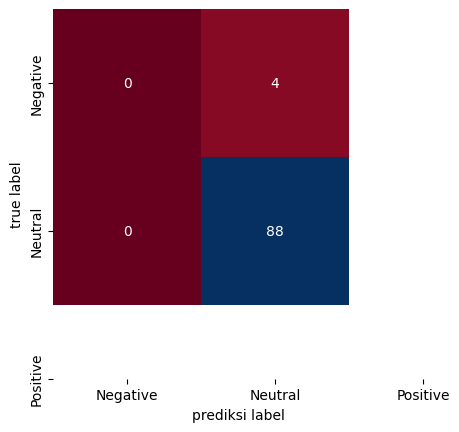

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Split the data into training and testing sets
x_train_tfidf, x_test_tfidf, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bayes = MultinomialNB()
##tahapan untuk menjalankan training
bayes.fit(x_train_tfidf,y_train)

#menjalankan data testing
nb_result = bayes.predict(x_test_tfidf)
from sklearn import metrics
model = metrics.accuracy_score(y_test, nb_result)
print("The Accuracy is",str('{:04.2f}'.format(model*100))+'%')

from sklearn.metrics import confusion_matrix
matrix2= confusion_matrix(y_test, nb_result)
print(matrix2)

import seaborn as sns
sns.heatmap(matrix2, square= True, annot= True, cbar= False, cmap='RdBu', xticklabels=['Negative','Neutral', 'Positive'], yticklabels= ['Negative','Neutral', 'Positive'], fmt= 'g')
plt.xlabel('prediksi label')
plt.ylabel('true label')

from sklearn.metrics import classification_report
print("The classification report is:")
print(classification_report(y_test, nb_result))

**8. EVALUASI**

Accuracy: 0.9565217391304348

Classification Report:
               precision    recall  f1-score   support

          -1       0.00      0.00      0.00         4
           0       0.96      1.00      0.98        88

    accuracy                           0.96        92
   macro avg       0.48      0.50      0.49        92
weighted avg       0.91      0.96      0.94        92



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


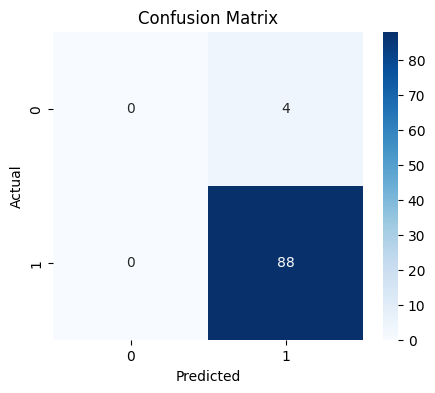

In [13]:
print("Accuracy:", accuracy_score(y_test, nb_result))
print("\nClassification Report:\n", classification_report(y_test, nb_result))

plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, nb_result), annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

**NER_NLTK**

In [14]:
import nltk
from nltk.tag.stanford import StanfordNERTagger

In [15]:
PATH_TO_JAR = '/content/stanford-ner.jar'
PATH_TO_MODEL = '/content/english.all.3class.distsim.crf.ser.gz'

In [18]:
import os

# Download Stanford NER
!wget https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip
!unzip stanford-ner-4.2.0.zip

# Move the jar and model files to /content/
# Corrected path based on unzip output
!mv stanford-ner-2020-11-17/stanford-ner.jar /content/
!mv stanford-ner-2020-11-17/classifiers/english.all.3class.distsim.crf.ser.gz /content/

non
tagger = StanfordNERTagger(model_filename=PATH_TO_MODEL,path_to_jar=PATH_TO_JAR, encoding='utf-8')

--2025-12-08 13:27:32--  https://nlp.stanford.edu/software/stanford-ner-4.2.0.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip [following]
--2025-12-08 13:27:32--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-4.2.0.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180437064 (172M) [application/zip]
Saving to: ‘stanford-ner-4.2.0.zip.1’

stanford-ner-4.2.0. 100%[===================>] 172.08M  5.05MB/s    in 30s     

2025-12-08 13:28:01 (5.80 MB/s) - ‘stanford-ner-4.2.0.zip.1’ saved [180437064/180437064]

Archive:  stanford-ner-4.2.0.zip
replace stanford-ner-2

In [20]:
sentence = "First up in London will be Riccardo Tisci, onetime Givenchy darling, favorite of Kardashian-Jenners everywhere, who returns to the catwalk with men’s and women’s wear after a year and a half away, this time to reimagine Burberry after the departure of Christopher Bailey."


In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [24]:
words = nltk.word_tokenize(sentence)

In [25]:
tagged = tagger.tag(words)
print(tagged)

[('First', 'O'), ('up', 'O'), ('in', 'O'), ('London', 'LOCATION'), ('will', 'O'), ('be', 'O'), ('Riccardo', 'PERSON'), ('Tisci', 'PERSON'), (',', 'O'), ('onetime', 'O'), ('Givenchy', 'ORGANIZATION'), ('darling', 'O'), (',', 'O'), ('favorite', 'O'), ('of', 'O'), ('Kardashian-Jenners', 'O'), ('everywhere', 'O'), (',', 'O'), ('who', 'O'), ('returns', 'O'), ('to', 'O'), ('the', 'O'), ('catwalk', 'O'), ('with', 'O'), ('men', 'O'), ('’', 'O'), ('s', 'O'), ('and', 'O'), ('women', 'O'), ('’', 'O'), ('s', 'O'), ('wear', 'O'), ('after', 'O'), ('a', 'O'), ('year', 'O'), ('and', 'O'), ('a', 'O'), ('half', 'O'), ('away', 'O'), (',', 'O'), ('this', 'O'), ('time', 'O'), ('to', 'O'), ('reimagine', 'O'), ('Burberry', 'O'), ('after', 'O'), ('the', 'O'), ('departure', 'O'), ('of', 'O'), ('Christopher', 'PERSON'), ('Bailey', 'PERSON'), ('.', 'O')]


**Spacy**

In [26]:
pip install spacy

In [27]:
pip install en_core_web_sm

In [28]:
import spacy
sentence = "First up in London will be Riccardo Tisci, onetime Givenchy darling, favorite of Kardashian-Jenners everywhere, who returns to the catwalk with men’s and women’s wear after a year and a half away, this time to reimagine Burberry after the departure of Christopher Bailey."
nlp = spacy.load('en_core_web_sm')
doc = nlp(sentence)
print(doc)


First up in London will be Riccardo Tisci, onetime Givenchy darling, favorite of Kardashian-Jenners everywhere, who returns to the catwalk with men’s and women’s wear after a year and a half away, this time to reimagine Burberry after the departure of Christopher Bailey.


In [29]:
for ent in doc.ents:
 print(ent.text,ent.label_)


First ORDINAL
London GPE
Riccardo Tisci PERSON
Kardashian-Jenners GPE
a year and a half DATE
Burberry PERSON
Christopher Bailey PERSON


In [30]:
import spacy
nlp = spacy.load("en_core_web_sm")
import en_core_web_sm
nlp = en_core_web_sm.load()
doc = nlp("First up United Nations in London will be Riccardo Tisci, onetime Givenchy darling, favorite of Kardashian-Jenners everywhere, who returns to the catwalk with men’s and women’s wear after a year and a half away, this time to reimagine Burberry after the departure of Christopher Bailey.")
print([(w.text, w.ent_type_) for w in doc])
print([(w.text, w.pos_) for w in doc])


[('First', 'ORDINAL'), ('up', ''), ('United', 'ORG'), ('Nations', 'ORG'), ('in', ''), ('London', 'GPE'), ('will', ''), ('be', ''), ('Riccardo', 'PERSON'), ('Tisci', 'PERSON'), (',', ''), ('onetime', ''), ('Givenchy', ''), ('darling', ''), (',', ''), ('favorite', ''), ('of', ''), ('Kardashian', 'GPE'), ('-', 'GPE'), ('Jenners', 'GPE'), ('everywhere', ''), (',', ''), ('who', ''), ('returns', ''), ('to', ''), ('the', ''), ('catwalk', ''), ('with', ''), ('men', ''), ('’s', ''), ('and', ''), ('women', ''), ('’s', ''), ('wear', ''), ('after', ''), ('a', 'DATE'), ('year', 'DATE'), ('and', 'DATE'), ('a', 'DATE'), ('half', 'DATE'), ('away', ''), (',', ''), ('this', ''), ('time', ''), ('to', ''), ('reimagine', ''), ('Burberry', 'PERSON'), ('after', ''), ('the', ''), ('departure', ''), ('of', ''), ('Christopher', 'PERSON'), ('Bailey', 'PERSON'), ('.', '')]
[('First', 'ADV'), ('up', 'ADV'), ('United', 'PROPN'), ('Nations', 'PROPN'), ('in', 'ADP'), ('London', 'PROPN'), ('will', 'AUX'), ('be', 'AUX'